In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        #入力層、隠れ層、出力層のノード数の設定
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #リンクの重み行列 wih , who
        #行列内の重み w_i_j, ノードiから次の層のノードj へのリンクの重み
        # w11 w21
        # w12 w22
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        #元のコード 上は平均が0で、標準偏差を入ってくるリンクの数の平方根の逆数とした正規分布
        #self.wih = np.random.rand(self.hnodes, self.inodes) - 0.5
        #self.who = np.random.rand(self.onodes, self.hnodes) - 0.5
        
        #学習率
        self.lr = learningrate
        
        #活性化関数はシグモイド関数
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #ニューラルネットワークの学習
    def train(self, inputs_list, targets_list):
        #入力リストを行列に変換
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #隠れ層に入ってくる信号の計算
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        #ここまではqueryと同じ
        
        
        #出力層の誤差= 目標出力-最終出力
        output_errors = targets - final_outputs
        #隠れ層の誤差は出力層の誤差をリンクの重みの割合で分配
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #隠れ層と出力層の間のリンクの重みを更新
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_inputs)), np.transpose(hidden_outputs))
        #入力層と隠れ層の間のリンクの重みを更新
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    # ニューラルネットワークへの照会
    def query(self, inputs_list):
        #入力リストを行列に変換
        inputs = np.array(inputs_list, ndmin=2).T
        
        #隠れ層に入ってくる信号の計算
        hidden_inputs = np.dot(self.wih, inputs)
        #隠れ層で結合された信号を活性化関数により出力
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #出力層に入ってくる信号の計算
        final_inputs = np.dot(self.who, hidden_outputs)
        #出力層で結合された信号を活性化関数により出力
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# 入力層、隠れ層、出力層のノード数
input_nodes = 784 #28x28
hidden_nodes = 200 #10〜784の間の適当な数字
output_nodes = 10

# 学習率 
learning_rate = 0.1

#ニューラルネットワークのインスタンスの生成
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [4]:
# MNIST訓練データのCSV　ファイルを読み込んでリストにする
training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
#ニューラルネットワークの学習

#エポック数
epoches = 5

#訓練データの全データに対して実行
for e in range(epoches):
    for record in training_data_list:
        #データをコンマでsplit
        all_values = record.split(',')
        # 入力値のスケーリングとシフト
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 目標配列の生成（ラベルの位置が0.99　残りは0.01）
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0]はこのデータのラベル
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass



In [6]:
# MNIST テストデータのCSV ファイルを読み込んでリストにする
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

7


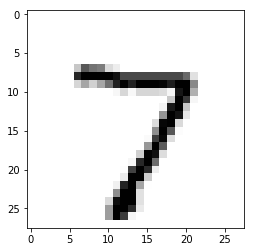

In [7]:
#テストデータ
all_values = test_data_list[0].split(',')
print(all_values[0])

image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [8]:
#判定
# n.query((np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

In [9]:
# ニューラルネットワークのテスト

#scorecardは判定のリスト、最初は空
scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    #正解は1番目
    correct_label = int(all_values[0])
#     print(correct_label, "correct label")
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #照会
    outputs = n.query(inputs)
    #最大値のインデックスがラベルに対応
    label = np.argmax(outputs)
#     print(label, "network's answer")
    
    #正解(1) 間違い(0) リストに追加
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
    pass

            

In [10]:
# print(scorecard)
#10個のうち1が正解の数。

In [11]:
# 評価値の計算
scorecard_array = np.array(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

print("performance = ", scorecard_array.sum() / scorecard_array.size * 100, "%")


performance =  0.0892
performance =  8.92 %


### 完全データ・セットによる学習とテスト

In [12]:
# hidden_layers, learning_rate, epoch_count
# 100, 0.3, 1 -> 8.92%
# 100, 0.1, 1 -> 93.8 %
# 100, 0.1, 2 ->  94.27%
# 100, 0.1, 5 ->  10.09%
# 200, 0.1, 5 ->  8.92 %